In [1]:
# Understanding relationship between context and rewards

import pandas as pd
import yaml
import os

root_dir = os.path.join("/home", "lorenzo", "Desktop", "mutant")
print(root_dir)
experiments = [
    {"name": "Baseline", "bw": 42, "rtt": 20, "bdp_mult": 1},
    {"name": "Low_Bandwidth", "bw": 6, "rtt": 20, "bdp_mult": 1},
    {"name": "High_RTT", "bw": 12, "rtt": 80, "bdp_mult": 1},
    {"name": "Large_Queue", "bw": 12, "rtt": 20, "bdp_mult": 10},
    {"name": "Mixed_Conditions", "bw": 42, "rtt": 30, "bdp_mult": 2},
    {"name": "Challenging_Network", "bw": 6, "rtt": 100, "bdp_mult": 1},
    {"name": "Challenging_Network_2", "bw": 12, "rtt": 30, "bdp_mult": 0.5},
]

# Read protocol list from protocols.yaml
with open(os.path.join(root_dir, "config/protocols.yml"), "r") as f:
    protocols = yaml.safe_load(f)
protocols = [p for p in protocols.keys()]

# Read csv from experiments
dfs = {}
for experiment in experiments:
    print(experiment["name"])
    dfs[experiment["name"]] = {}
    for proto in protocols:
        print(proto)
        bw = experiment["bw"]
        rtt = experiment["rtt"]
        bdp_mult = experiment["bdp_mult"]
        dfs[experiment["name"]][proto] = pd.read_csv(os.path.join(root_dir, "log/collection/csv/30s", f"{proto}.bw{bw}.rtt{rtt}.bdp_mult{bdp_mult}.csv"))


/home/lorenzo/Desktop/mutant
Baseline
cubic
hybla
bbr
westwood
veno
vegas
yeah
cdg
bic
htcp
highspeed
illinois
base
Low_Bandwidth
cubic
hybla
bbr
westwood
veno
vegas
yeah
cdg
bic
htcp
highspeed
illinois
base
High_RTT
cubic
hybla
bbr
westwood
veno
vegas
yeah
cdg
bic
htcp
highspeed
illinois
base
Large_Queue
cubic
hybla
bbr
westwood
veno
vegas
yeah
cdg
bic
htcp
highspeed
illinois
base
Mixed_Conditions
cubic
hybla
bbr
westwood
veno
vegas
yeah
cdg
bic
htcp
highspeed
illinois
base
Challenging_Network
cubic
hybla
bbr
westwood
veno
vegas
yeah
cdg
bic
htcp
highspeed
illinois
base
Challenging_Network_2
cubic
hybla
bbr
westwood
veno
vegas
yeah
cdg
bic
htcp
highspeed
illinois
base


In [5]:
dfs['Baseline']['cubic']

,now,cwnd,rtt,srtt,rtt_dev,rtt_min,mss,delivered,lost,in_flight,retransmitted,delivery_rate,prev_proto_id,crt_proto_id,thruput,loss_rate,reward
0,206902,10,23158,185264,46316,23158,1460,1,0,0,0,0,0,0,0.000000,0.0,0.000000
1,206908,10,23063,185169,34832,23063,1448,2,0,0,0,0,0,0,0.000000,0.0,0.000000
2,206911,10,23900,185425,35438,23075,1448,2,0,0,0,0,0,0,0.000000,0.0,0.000000
3,206914,10,23592,185615,26570,23063,1448,3,0,0,0,1,0,0,0.502276,0.0,1.359164
4,206920,10,23699,186113,20426,23063,1448,4,0,0,0,1,0,0,0.502276,0.0,1.355527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15289,209741,131,41743,395023,5995,22082,1448,32156,1,134,1,129,0,0,29.899277,0.0,2263.075226
15290,209743,126,51472,397118,6592,22082,1448,32158,1,146,1,132,0,0,35.587497,0.0,3189.152702
15291,209744,125,41366,400229,8055,22082,1448,32186,1,147,1,130,0,0,29.255935,0.0,2138.550012
15292,209744,117,42582,392791,8733,22082,1448,32190,1,167,1,130,0,0,31.733642,0.0,2563.765551


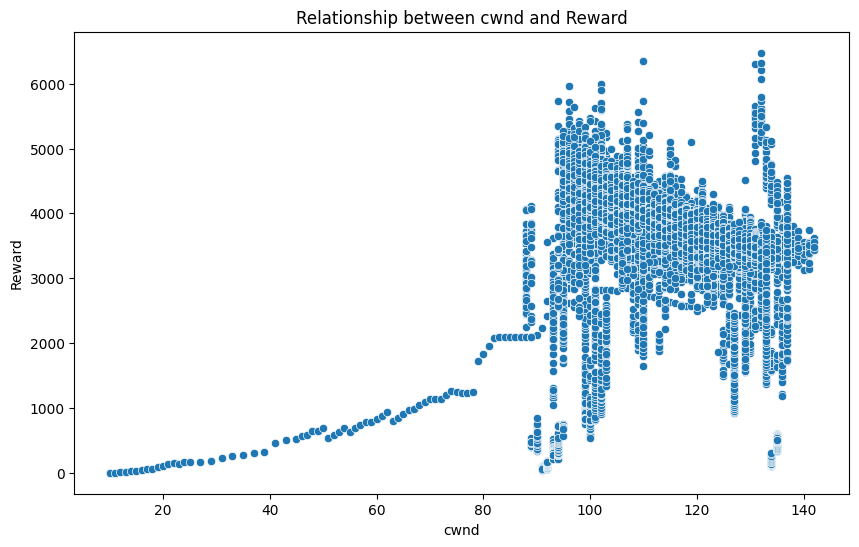

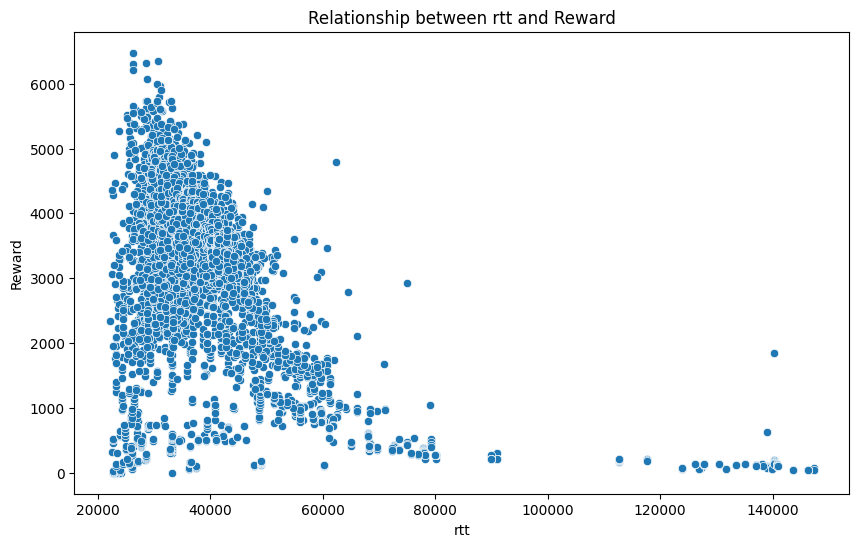

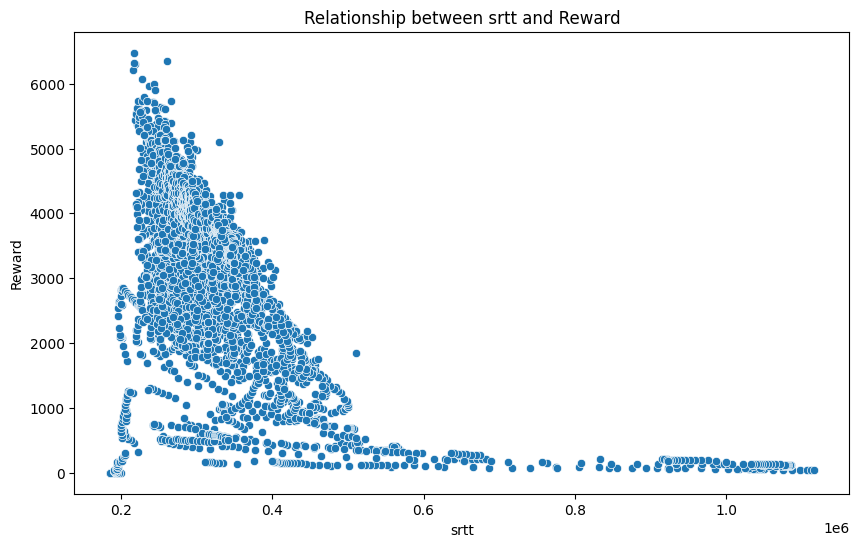

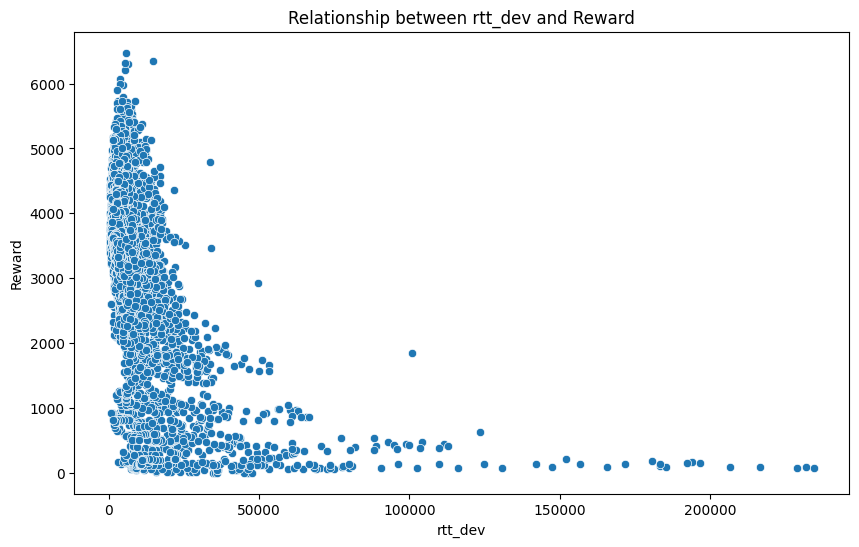

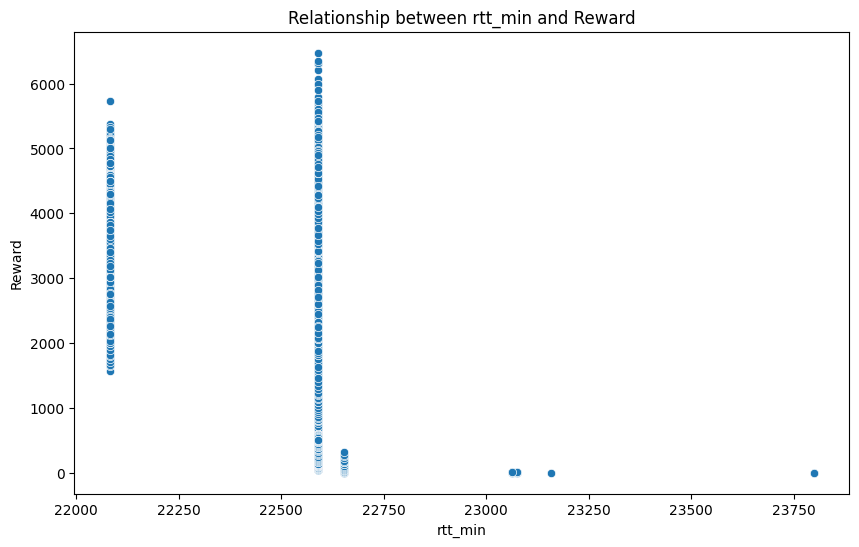

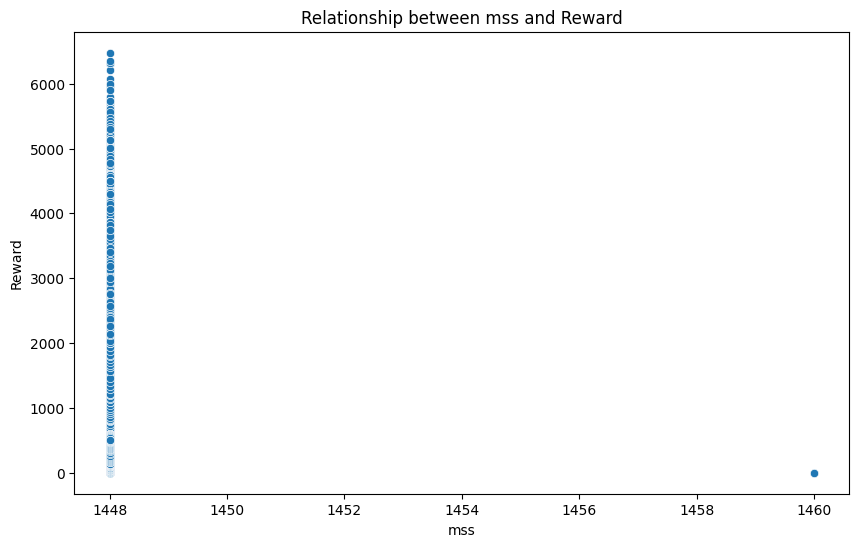

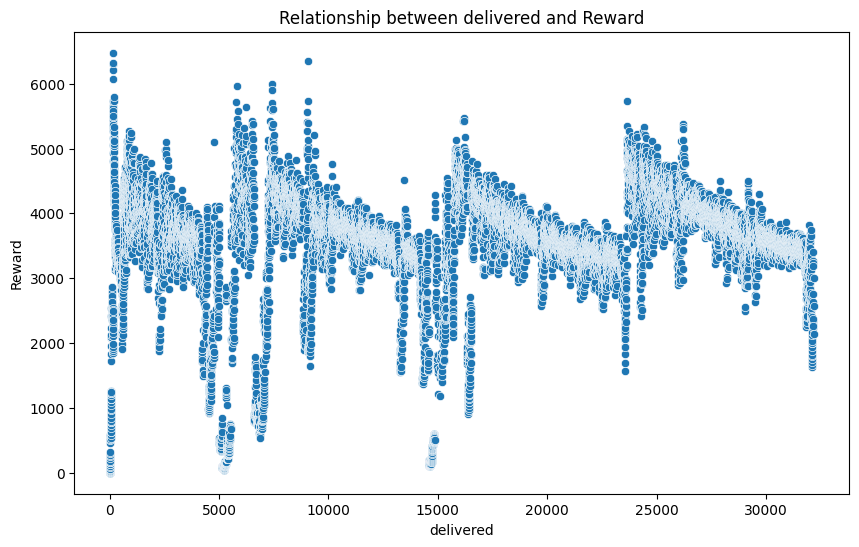

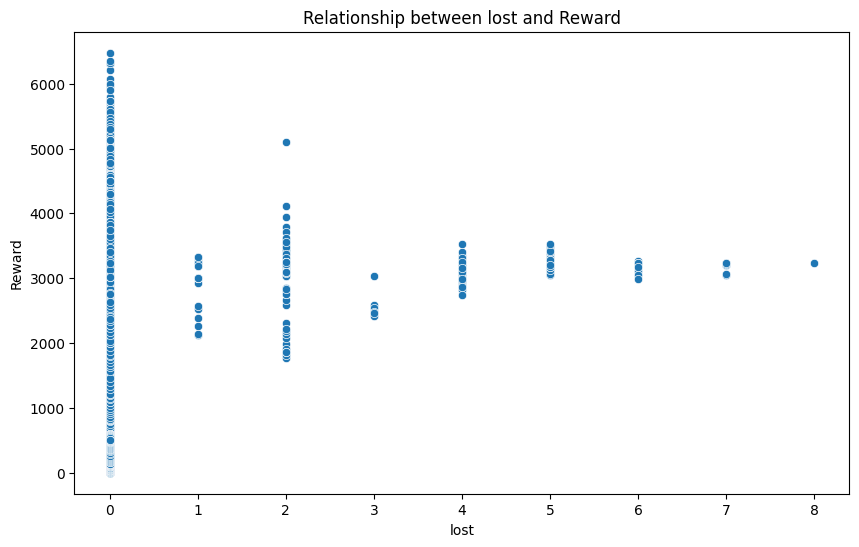

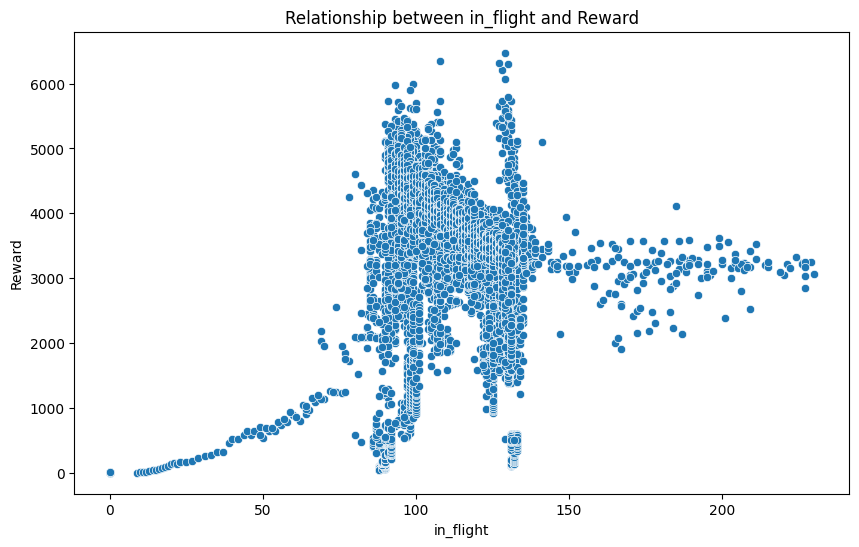

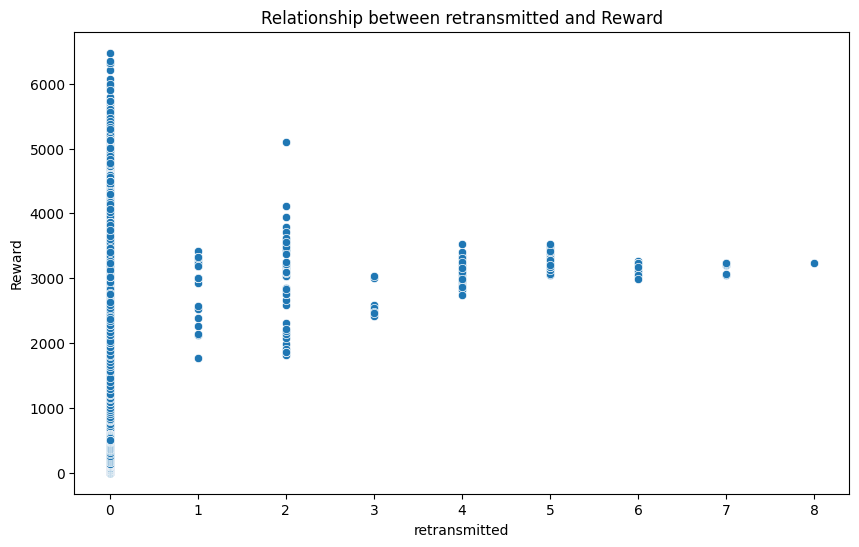

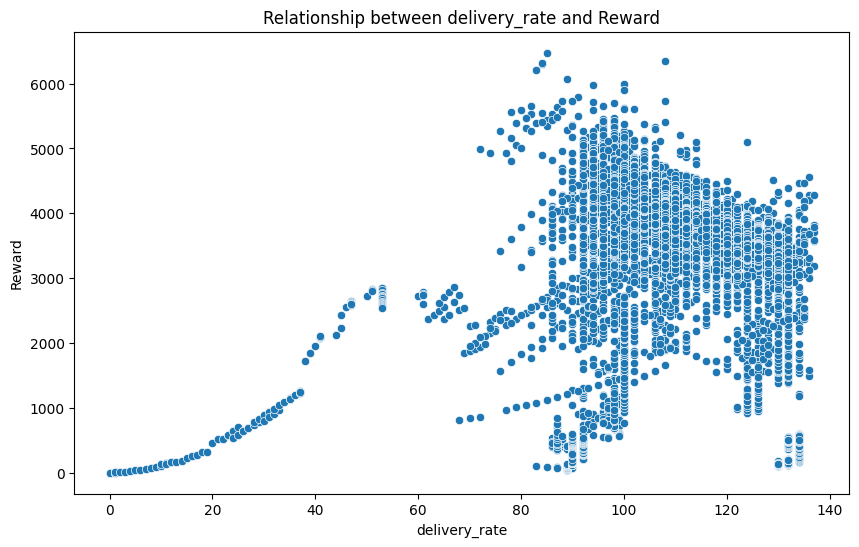

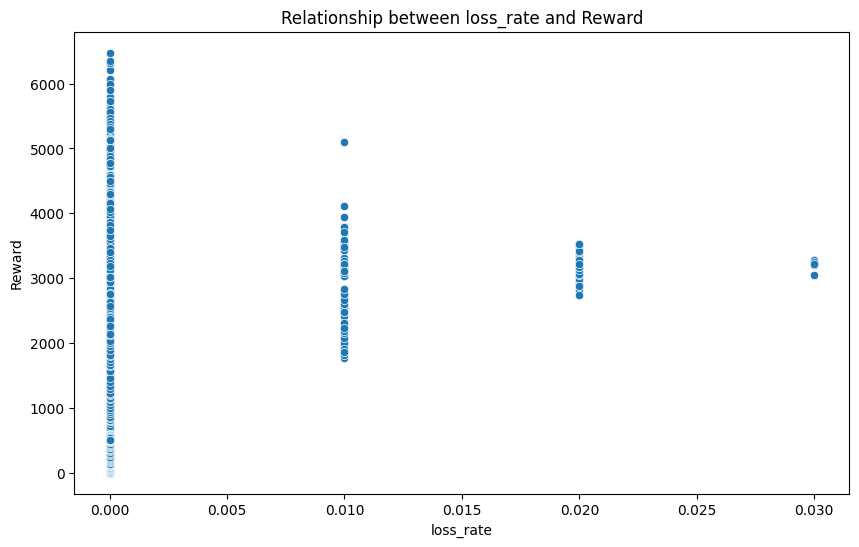

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['cwnd', 'rtt', 'srtt', 'rtt_dev', 'rtt_min', 'mss', 'delivered', 'lost', 'in_flight', 'retransmitted', 'delivery_rate', 'loss_rate']
reward = 'reward'

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y=reward, data=dfs['Baseline']['cubic'])
    plt.title(f'Relationship between {feature} and Reward')
    plt.xlabel(feature)
    plt.ylabel('Reward')
    plt.show()


In [8]:
from scipy.stats import pearsonr

for feature in features:
    corr, _ = pearsonr(dfs['Baseline']['cubic'][feature], dfs['Baseline']['cubic'][reward])
    print(f'Pearson correlation between {feature} and Reward: {corr:.3f}')


Pearson correlation between cwnd and Reward: -0.061
Pearson correlation between rtt and Reward: -0.552
Pearson correlation between srtt and Reward: -0.613
Pearson correlation between rtt_dev and Reward: -0.535
Pearson correlation between rtt_min and Reward: -0.203
Pearson correlation between mss and Reward: -0.047
Pearson correlation between delivered and Reward: 0.130
Pearson correlation between lost and Reward: -0.047
Pearson correlation between in_flight and Reward: -0.078
Pearson correlation between retransmitted and Reward: -0.047
Pearson correlation between delivery_rate and Reward: -0.034
Pearson correlation between loss_rate and Reward: -0.046
